# KNN -> K Nearest Neighbours

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = pd.read_csv('xdata.csv')
Y = pd.read_csv('ydata.csv')

X_data,Y_data = X.values, Y.values
Y_data = Y_data[:,1:].reshape((-1,))

In [28]:
X_data.shape, Y_data.shape

((399, 3), (399,))

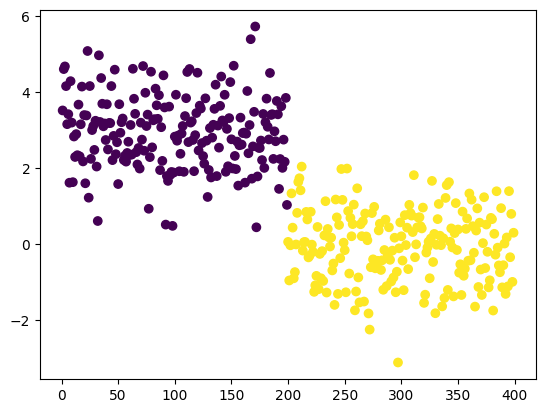

In [29]:
plt.scatter(X_data[:,0],X_data[:,1], c=Y_data)
plt.show()

In [30]:
def distance_formula(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [31]:
distance_formula(X_data[0],X_data[1]), distance_formula(X_data[0],X_data[2]), distance_formula(X_data[0],X_data[0])

(1.479382391210793, 2.3124224857812368, 0.0)

In [32]:
X_data


array([[ 1.00000000e+00,  3.51627900e+00,  3.71975047e+00],
       [ 2.00000000e+00,  4.60649561e+00,  3.41437943e+00],
       [ 3.00000000e+00,  4.67701056e+00,  3.04724443e+00],
       ...,
       [ 3.97000000e+02,  7.89625683e-01,  9.31669806e-01],
       [ 3.98000000e+02, -1.00253042e+00, -6.76162472e-01],
       [ 3.99000000e+02,  2.92386778e-01,  5.61177823e-01]])

In [33]:
print(X_data[0])
print(X_data[1])
print(X_data[2])

[1.         3.516279   3.71975047]
[2.         4.60649561 3.41437943]
[3.         4.67701056 3.04724443]


In [34]:
class KNNClassifier:
    def __init__(self,k=5):
        self.k = k
    
    def fit(X,Y):
        self.X = X
        self.Y = Y

    def distance_formula(p1,p2):
        return ((p1[0] -p2[0])**2 + (p1[1] - p2[1])**2)**0.5

    def predict(self,p):
        
        distances = []  # List of tuples, where 0th index will have distance of i and 1st index will have i

        for i in range(len(self.X)):
            distances.append((self.distance_formula(self.X[i],p),i))

        distances = sorted(distances, key= lambda x: x[0])
        points_with_distances = distances[:self.k]

        classes = []

        for dist, i in points_with_distances:
            classes.append(self.y[i])

        class_, counts = np.unique(classes, return_counts=True)


        ix = np.argmax(counts)

        pred = {"class": class_[ix], "prop": np.max(counts)/np.sum(counts)}

        return pred


In [35]:
knn_model = KNNClassifier()

In [38]:
knn_model.fit(X_train,Y_Train)

In [39]:
knn_model.predict(X_test[1])

NameError: name 'X_test' is not defined